In [1]:
import pandas as pd
import os

os.makedirs("data_cleaned", exist_ok=True)

# Load files
circ_dis = pd.read_excel("circRNA-disease.xlsx")
mir_dis = pd.read_excel("miRNA-disease.xlsx")
circ_mir = pd.read_excel("circRNA-miRNA.xlsx")
circ = pd.read_excel("circRNAs.xlsx")
mir = pd.read_excel("miRNAs.xlsx")
dis = pd.read_excel("diseases.xlsx")

# Preview
for name, df in [("circRNA-disease", circ_dis),
                 ("miRNA-disease", mir_dis),
                 ("circRNA-miRNA", circ_mir),
                 ("circRNAs", circ),
                 ("miRNAs", mir),
                 ("diseases", dis)]:
    print(f"\n{name} → {df.shape} rows, {df.columns.tolist()[:5]}")



circRNA-disease → (985, 2) rows, ['circRNA', 'disease']

miRNA-disease → (828, 2) rows, ['miRNA', 'disease']

circRNA-miRNA → (896, 2) rows, ['circRNA', 'miRNA']

circRNAs → (828, 1) rows, ['circRNA']

miRNAs → (682, 1) rows, ['miRNA']

diseases → (122, 1) rows, ['disease']


In [2]:
def clean_df(df):
    df = df.dropna(how="all").drop_duplicates()
    for col in df.columns:
        df[col] = (df[col]
                   .astype(str)
                   .str.strip()
                   .str.replace(r'\s+', ' ', regex=True)
                   .str.lower())
    return df

In [3]:
circ_dis = clean_df(circ_dis)
mir_dis = clean_df(mir_dis)
circ_mir = clean_df(circ_mir)
circ = clean_df(circ)
mir = clean_df(mir)
dis = clean_df(dis)

In [4]:
for name, df in [("circRNA-disease", circ_dis),
                 ("miRNA-disease", mir_dis),
                 ("circRNA-miRNA", circ_mir),
                 ("circRNAs", circ),
                 ("miRNAs", mir),
                 ("diseases", dis)]:
    print(f"\n{name} → {df.shape} rows, {df.columns.tolist()[:5]}")


circRNA-disease → (985, 2) rows, ['circRNA', 'disease']

miRNA-disease → (828, 2) rows, ['miRNA', 'disease']

circRNA-miRNA → (896, 2) rows, ['circRNA', 'miRNA']

circRNAs → (828, 1) rows, ['circRNA']

miRNAs → (682, 1) rows, ['miRNA']

diseases → (122, 1) rows, ['disease']


In [5]:
circ_map = dict(zip(circ['circRNA'].str.lower(), circ['circRNA']))
mir_map = dict(zip(mir['miRNA'].str.lower(), mir['miRNA']))
dis_map = dict(zip(dis['disease'].str.lower(), dis['disease']))

In [6]:
circ_dis['circRNA'] = circ_dis['circRNA'].map(lambda x: circ_map.get(x, x))
circ_dis['disease'] = circ_dis['disease'].map(lambda x: dis_map.get(x, x))

mir_dis['miRNA'] = mir_dis['miRNA'].map(lambda x: mir_map.get(x, x))
mir_dis['disease'] = mir_dis['disease'].map(lambda x: dis_map.get(x, x))

circ_mir['circRNA'] = circ_mir['circRNA'].map(lambda x: circ_map.get(x, x))
circ_mir['miRNA'] = circ_mir['miRNA'].map(lambda x: mir_map.get(x, x))


In [7]:
for df, label in [(circ_dis, 'circRNA–disease'),
                  (mir_dis, 'miRNA–disease'),
                  (circ_mir, 'circRNA–miRNA')]:
    print(f"{label}:")
    print("  Missing circRNAs:", df['circRNA'].isna().sum() if 'circRNA' in df else 0)
    print("  Missing miRNAs:", df['miRNA'].isna().sum() if 'miRNA' in df else 0)
    print("  Missing diseases:", df['disease'].isna().sum() if 'disease' in df else 0)


circRNA–disease:
  Missing circRNAs: 0
  Missing miRNAs: 0
  Missing diseases: 0
miRNA–disease:
  Missing circRNAs: 0
  Missing miRNAs: 0
  Missing diseases: 0
circRNA–miRNA:
  Missing circRNAs: 0
  Missing miRNAs: 0
  Missing diseases: 0


In [8]:
circ_dis.to_csv("data_cleaned/circRNA_disease_clean.csv", index=False)
mir_dis.to_csv("data_cleaned/miRNA_disease_clean.csv", index=False)
circ_mir.to_csv("data_cleaned/circRNA_miRNA_clean.csv", index=False)
circ.to_csv("data_cleaned/circRNA_nodes_clean.csv", index=False)
mir.to_csv("data_cleaned/miRNA_nodes_clean.csv", index=False)
dis.to_csv("data_cleaned/disease_nodes_clean.csv", index=False)


In [9]:
print("Unique circRNAs:", circ['circRNA'].nunique())
print("Unique miRNAs:", mir['miRNA'].nunique())
print("Unique diseases:", dis['disease'].nunique())
print("circRNA–miRNA pairs:", circ_mir.shape[0])
print("miRNA–disease pairs:", mir_dis.shape[0])
print("circRNA–disease pairs:", circ_dis.shape[0])


Unique circRNAs: 828
Unique miRNAs: 682
Unique diseases: 122
circRNA–miRNA pairs: 896
miRNA–disease pairs: 828
circRNA–disease pairs: 985


In [22]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# -------------------------------
# BUILD THE HETEROGENEOUS GRAPH G
# -------------------------------
G = nx.Graph()

# Add circRNA nodes
for r in circ['circRNA']:
    G.add_node(r, type='circRNA')

# Add miRNA nodes
for r in mir['miRNA']:
    G.add_node(r, type='miRNA')

# Add disease nodes
for r in dis['disease']:
    G.add_node(r, type='disease')

# Add circRNA–miRNA edges
for _, row in circ_mir.iterrows():
    G.add_edge(row['circRNA'], row['miRNA'], relation='circRNA-miRNA')

# Add miRNA–disease edges
for _, row in mir_dis.iterrows():
    G.add_edge(row['miRNA'], row['disease'], relation='miRNA-disease')

# Add circRNA–disease edges
for _, row in circ_dis.iterrows():
    G.add_edge(row['circRNA'], row['disease'], relation='circRNA-disease')

print("\nGraph successfully constructed!")
print("Total nodes:", G.number_of_nodes())
print("Total edges:", G.number_of_edges())
print("Node types:", nx.get_node_attributes(G, 'type'))





Graph successfully constructed!
Total nodes: 1632
Total edges: 2709
Node types: {'bcrc-3': 'circRNA', 'cbl.11': 'circRNA', 'cdr1as': 'circRNA', 'circ_ankib1': 'circRNA', 'circ_arf3': 'circRNA', 'circ_katnal1': 'circRNA', 'circ_orc2': 'circRNA', 'circ_slc19a1': 'circRNA', 'circ_specc1': 'circRNA', 'circ2174': 'circRNA', 'circ-abcb10': 'circRNA', 'circabcc2': 'circRNA', 'circabcc4': 'circRNA', 'circ-acaca': 'circRNA', 'circacap2': 'circRNA', 'circ-adam9': 'circRNA', 'circadamts13': 'circRNA', 'circadamts14': 'circRNA', 'circagfg1': 'circRNA', 'circ-akt3': 'circRNA', 'circamotl1l': 'circRNA', 'circ-anapc7': 'circRNA', 'circanks1b': 'circRNA', 'circasap1': 'circRNA', 'circ-ash2l': 'circRNA', 'circass1': 'circRNA', 'circatp2b1': 'circRNA', 'circ-atp8a2': 'circRNA', 'circatrnl1': 'circRNA', 'circatxn7': 'circRNA', 'circbach2': 'circRNA', 'circ-banp': 'circRNA', 'circbirc6': 'circRNA', 'circbmpr2': 'circRNA', 'circc3p1': 'circRNA', 'circ-cbfb': 'circRNA', 'circcct3': 'circRNA', 'circ-cdc45':

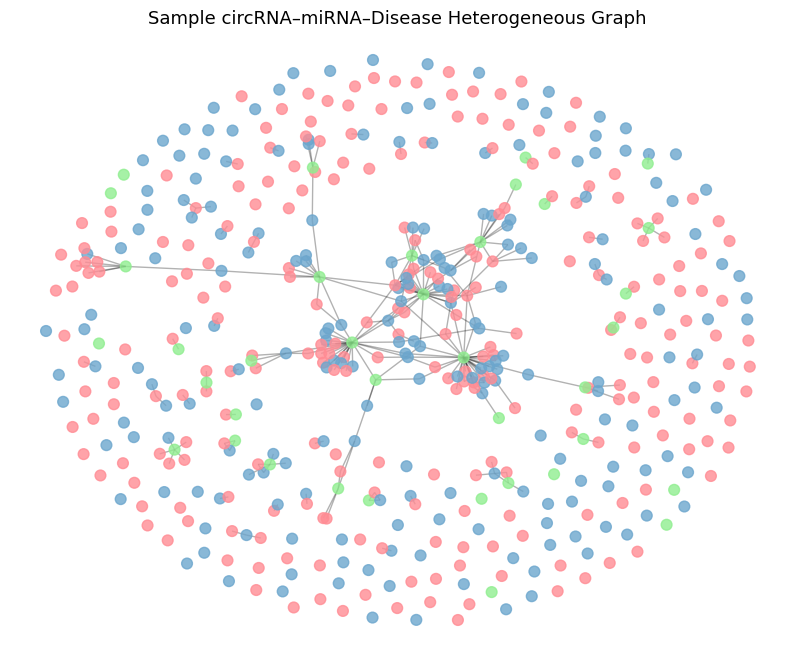

In [25]:
# ------------------------------------
# VISUALIZE A SAMPLE SUBGRAPH FROM G
# ------------------------------------

# Prevent sampling more nodes than available
sample_size = min(500, G.number_of_nodes())
sample_nodes = random.sample(list(G.nodes), sample_size)
H = G.subgraph(sample_nodes)

# Assign colors by node type
color_map = []
for node in H.nodes():
    t = G.nodes[node]['type']
    if t == 'circRNA':
        color_map.append("#FF8C94")  # dusty pink
    elif t == 'miRNA':
        color_map.append("#6CA6CD")  # blue
    else:
        color_map.append("#90EE90")  # green

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(H, k=0.8, seed=42)
nx.draw_networkx_nodes(H, pos, node_color=color_map, node_size=60, alpha=0.8)
nx.draw_networkx_edges(H, pos, alpha=0.3, width=1)
plt.title("Sample circRNA–miRNA–Disease Heterogeneous Graph", fontsize=13)
plt.axis('off')
plt.show()

In [20]:
whos

Variable           Type         Data/Info
-----------------------------------------
circ               DataFrame    Shape: (828, 1)
circ_dis           DataFrame    Shape: (985, 2)
circ_map           dict         n=828
circ_mir           DataFrame    Shape: (896, 2)
clean_df           function     <function clean_df at 0x000001763640DDA0>
create_edge_list   function     <function create_edge_list at 0x0000017638DEC400>
df                 DataFrame    Shape: (896, 2)
df_check           DataFrame    Shape: (896, 2)
dis                DataFrame    Shape: (122, 1)
dis_map            dict         n=122
file               str          circRNA_miRNA_edges.csv
label              str          circRNA–miRNA
mir                DataFrame    Shape: (682, 1)
mir_dis            DataFrame    Shape: (828, 2)
mir_map            dict         n=682
missing_circ       DataFrame    Shape: (0, 2)
missing_dis        DataFrame    Shape: (0, 2)
name               str          diseases
nx                 module  

In [13]:
def create_edge_list(df, source_col, target_col, source_map, target_map, filename):
    # Map node names to standardized IDs
    df[source_col] = df[source_col].str.lower().map(source_map)
    df[target_col] = df[target_col].str.lower().map(target_map)
    
    # Drop rows where mapping failed
    df = df.dropna(subset=[source_col, target_col])
    
    # Keep only source and target columns and remove duplicates
    edge_list = df[[source_col, target_col]].drop_duplicates()
    
    # Save to CSV
    edge_list.to_csv(os.path.join("data_cleaned", filename), index=False)
    print(f"Saved {filename} → {edge_list.shape[0]} edges")


In [14]:
# circRNA-disease edges
create_edge_list(circ_dis, "circRNA", "disease", circ_map, dis_map, "circRNA_disease_edges.csv")

# miRNA-disease edges
create_edge_list(mir_dis, "miRNA", "disease", mir_map, dis_map, "miRNA_disease_edges.csv")

# circRNA-miRNA edges
create_edge_list(circ_mir, "circRNA", "miRNA", circ_map, mir_map, "circRNA_miRNA_edges.csv")


Saved circRNA_disease_edges.csv → 985 edges
Saved miRNA_disease_edges.csv → 828 edges
Saved circRNA_miRNA_edges.csv → 896 edges


In [15]:
# Quick check
for file in ["circRNA_disease_edges.csv", "miRNA_disease_edges.csv", "circRNA_miRNA_edges.csv"]:
    df_check = pd.read_csv(os.path.join("data_cleaned", file))
    print(f"{file}: {df_check.shape[0]} edges")


circRNA_disease_edges.csv: 985 edges
miRNA_disease_edges.csv: 828 edges
circRNA_miRNA_edges.csv: 896 edges


In [16]:
# Example for circRNA-disease
missing_circ = circ_dis[~circ_dis['circRNA'].str.lower().isin(circ_map)]
missing_dis = circ_dis[~circ_dis['disease'].str.lower().isin(dis_map)]

print("Missing circRNAs:", missing_circ)
print("Missing diseases:", missing_dis)


Missing circRNAs: Empty DataFrame
Columns: [circRNA, disease]
Index: []
Missing diseases: Empty DataFrame
Columns: [circRNA, disease]
Index: []


In [17]:
print(circ_dis['circRNA'].unique()[:20])
print(circ_dis['disease'].unique()[:20])


['circ-anapc7' 'hsa_circ_0000488' 'hsa_circ_0009910' 'hsa_circ_100290'
 'circpan3' 'circrna_100290' 'circ-hipk2' 'bcrc-3' 'cdr1as' 'circcep128'
 'circdock1' 'circfndc3b' 'circ-foxo3' 'circfut8' 'circ-itch' 'circlpar1'
 'circmto1' 'circnr3c1' 'circpicalm' 'circptpra']
['leukemia, myeloid, acute' 'leukemia, promyelocytic, acute'
 'urinary bladder neoplasms' 'bladder urothelial carcinoma'
 'breast neoplasms' 'prostatic neoplasms, castration-resistant'
 'uterine cervical neoplasms' 'cholangiocarcinoma'
 'leukemia, lymphocytic, chronic, b-cell'
 'leukemia, myelogenous, chronic, bcr-abl positive'
 'carcinoma, renal cell' 'colonic neoplasms' 'colorectal neoplasms'
 'cutaneous squamous cell carcinoma' 'lymphoma, large b-cell, diffuse'
 'endometrial neoplasms' 'carcinoma, ovarian epithelial'
 'esophageal neoplasms' 'esophageal squamous cell carcinoma'
 'gallbladder neoplasms']
